### Importaciones necesarias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("movement_data.csv")
print(f"Shape del dataset: {df.shape}")
print(f"\nPrimeras filas:")
df.head()

Shape del dataset: (1320, 136)

Primeras filas:


,frame,video,x_0,y_0,z_0,visibility_0,x_1,y_1,z_1,visibility_1,...,x_31,y_31,z_31,visibility_31,x_32,y_32,z_32,visibility_32,action,speed
0,0,caminar_adelante_01_lento.mp4,0.380043,0.502971,-0.263591,0.999983,0.371235,0.494323,-0.249742,0.999915,...,0.803372,0.437682,-0.006685,0.984965,0.802164,0.587915,-0.001506,0.987411,caminar_adelante,lento
1,1,caminar_adelante_01_lento.mp4,0.379953,0.503181,-0.248392,0.999983,0.371091,0.494398,-0.234505,0.999917,...,0.803798,0.438295,-0.023030,0.985106,0.801903,0.587889,-0.023081,0.987298,caminar_adelante,lento
2,2,caminar_adelante_01_lento.mp4,0.379606,0.503427,-0.237844,0.999983,0.370702,0.494476,-0.223269,0.999919,...,0.804052,0.438536,-0.027811,0.985274,0.801714,0.587730,-0.033756,0.987229,caminar_adelante,lento
3,3,caminar_adelante_01_lento.mp4,0.379136,0.504005,-0.225440,0.999983,0.370205,0.494858,-0.210843,0.999921,...,0.804137,0.439111,-0.031215,0.985314,0.801545,0.587636,-0.035066,0.987086,caminar_adelante,lento
4,4,caminar_adelante_01_lento.mp4,0.378886,0.504806,-0.219428,0.999982,0.369857,0.495480,-0.205034,0.999920,...,0.804286,0.439285,-0.031118,0.985214,0.801231,0.587634,-0.029826,0.986902,caminar_adelante,lento


## 1. Información General del Dataset

In [13]:
# Información básica
print("="*60)
print("INFORMACIÓN DEL DATASET")
print("="*60)
print(f"\nTotal de frames: {len(df)}")
print(f"Total de columnas: {len(df.columns)}")
print(f"\nColumnas del dataset:")
print(df.columns.tolist()[:10], "... (primeras 10)")

print("\n" + "="*60)
print("DISTRIBUCIÓN DE ACCIONES Y VELOCIDADES")
print("="*60)
print("\nAcciones únicas:")
print(df['action'].value_counts())
print("\nVelocidades únicas:")
print(df['speed'].value_counts())

print("\n" + "="*60)
print("VALORES NULOS")
print("="*60)
print(df.isnull().sum().sum(), "valores nulos en total")

INFORMACIÓN DEL DATASET

Total de frames: 1320
Total de columnas: 136

Columnas del dataset:
['frame', 'video', 'x_0', 'y_0', 'z_0', 'visibility_0', 'x_1', 'y_1', 'z_1', 'visibility_1'] ... (primeras 10)

DISTRIBUCIÓN DE ACCIONES Y VELOCIDADES

Acciones únicas:
action
caminar_adelante    376
girar               240
caminar_atras       228
giro                219
pararse             143
sentarse            114
Name: count, dtype: int64

Velocidades únicas:
speed
01        476
rapido    347
lento     257
02        240
Name: count, dtype: int64

VALORES NULOS
0 valores nulos en total


## 2. Visualización de Distribuciones

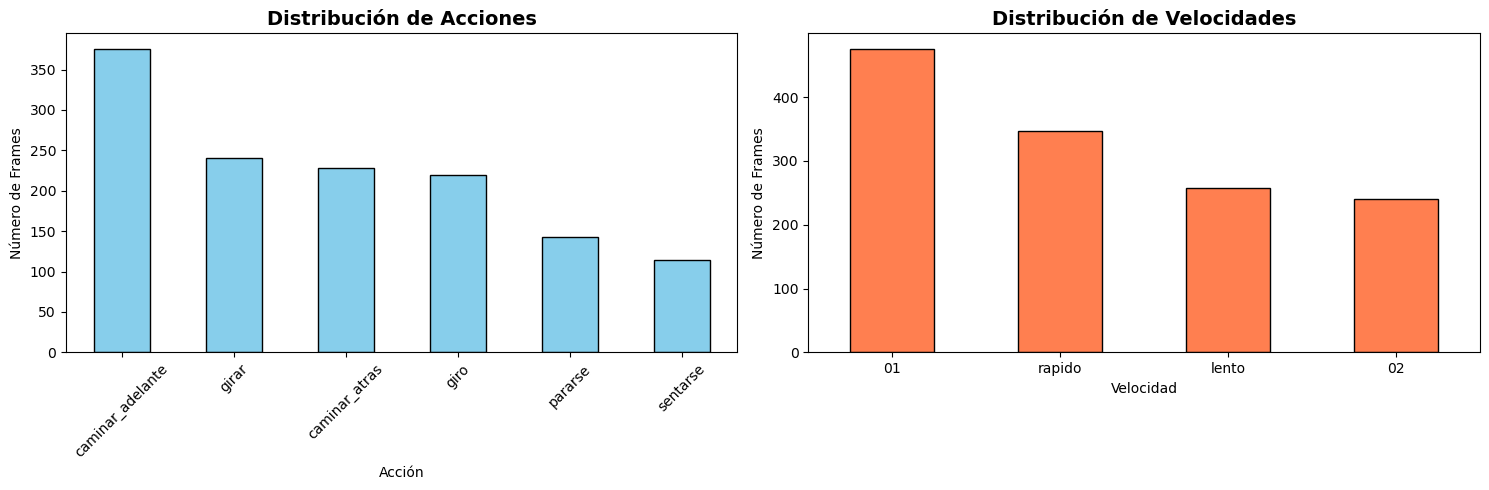


Frames por video:
video
girar_rapido_02.mp4               240
giro_lento_01.mp4                 219
caminar_adelante_02_rapido.mp4    213
caminar_adelante_01_lento.mp4     163
pararse_lento_01.mp4              143
caminar_atras_02_rapido.mp4       134
sentarse_lento_01.mp4             114
caminar_atras_01_lento.mp4         94
Name: frame, dtype: int64


In [14]:
# Gráficos de distribución
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Distribución de acciones
df['action'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de Acciones', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Acción')
axes[0].set_ylabel('Número de Frames')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Distribución de velocidades
df['speed'].value_counts().plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Distribución de Velocidades', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Velocidad')
axes[1].set_ylabel('Número de Frames')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Frames por video
print("\nFrames por video:")
print(df.groupby('video')['frame'].count().sort_values(ascending=False))

## 3. Análisis de Landmarks Clave

Los landmarks más importantes para análisis de movimiento humano son:
- **23, 24**: Caderas (izquierda, derecha)
- **25, 26**: Rodillas (izquierda, derecha)  
- **27, 28**: Tobillos (izquierda, derecha)
- **11, 12**: Hombros (izquierda, derecha)

In [15]:
# Definir landmarks clave
key_landmarks = {
    'Cadera Izq': 23,
    'Cadera Der': 24,
    'Rodilla Izq': 25,
    'Rodilla Der': 26,
    'Tobillo Izq': 27,
    'Tobillo Der': 28
}

# Estadísticas descriptivas de los landmarks clave
print("="*60)
print("ESTADÍSTICAS DE LANDMARKS CLAVE (Posición Y)")
print("="*60)

for name, idx in key_landmarks.items():
    col = f'y_{idx}'
    print(f"\n{name} (landmark {idx}):")
    print(f"  Media: {df[col].mean():.4f}")
    print(f"  Desv. Est: {df[col].std():.4f}")
    print(f"  Min: {df[col].min():.4f}")
    print(f"  Max: {df[col].max():.4f}")

ESTADÍSTICAS DE LANDMARKS CLAVE (Posición Y)

Cadera Izq (landmark 23):
  Media: 0.5251
  Desv. Est: 0.0613
  Min: 0.2591
  Max: 0.7530

Cadera Der (landmark 24):
  Media: 0.5626
  Desv. Est: 0.0629
  Min: 0.3312
  Max: 0.7967

Rodilla Izq (landmark 25):
  Media: 0.5839
  Desv. Est: 0.1247
  Min: 0.2581
  Max: 0.8937

Rodilla Der (landmark 26):
  Media: 0.6416
  Desv. Est: 0.0926
  Min: 0.3341
  Max: 0.9169

Tobillo Izq (landmark 27):
  Media: 0.6492
  Desv. Est: 0.1849
  Min: 0.2318
  Max: 1.0864

Tobillo Der (landmark 28):
  Media: 0.6975
  Desv. Est: 0.1457
  Min: 0.3306
  Max: 1.1665


## 4. Trayectorias de Movimiento por Acción

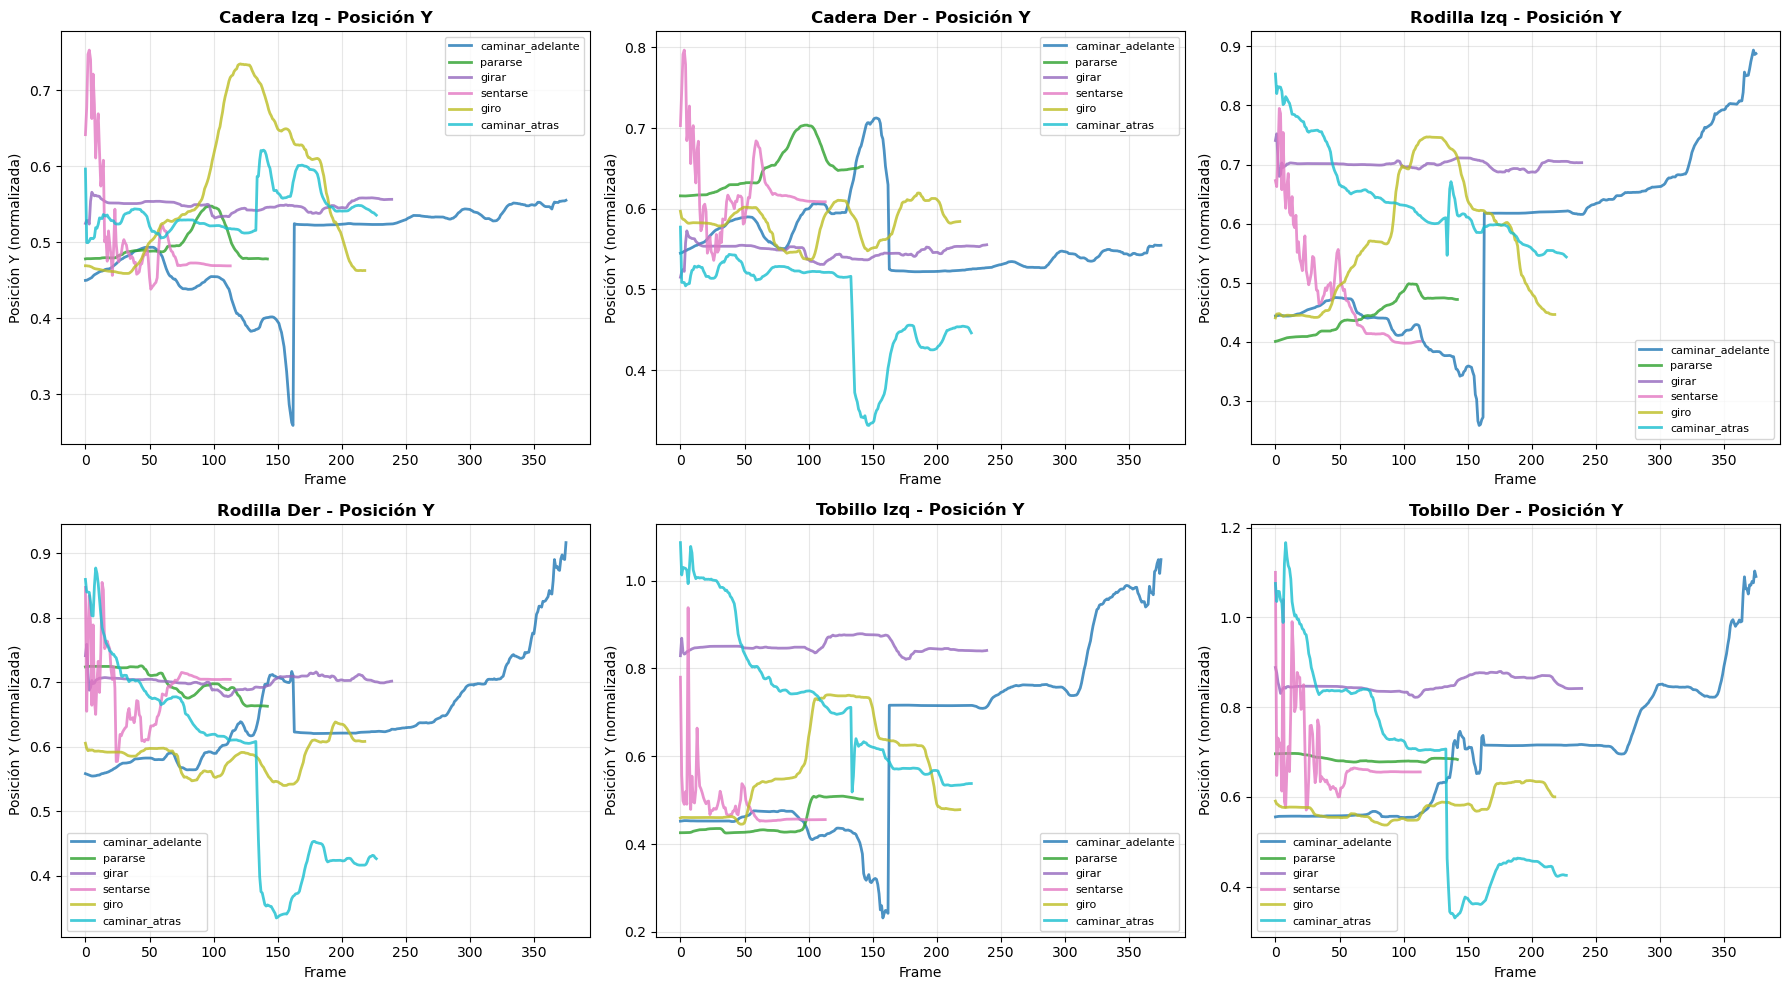

In [16]:
# Visualizar trayectorias de landmarks clave por acción
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

colors = plt.cm.tab10(np.linspace(0, 1, len(df['action'].unique())))

for idx, (name, landmark_id) in enumerate(key_landmarks.items()):
    for action_idx, action in enumerate(df['action'].unique()):
        action_data = df[df['action'] == action].reset_index(drop=True)
        axes[idx].plot(action_data[f'y_{landmark_id}'], 
                      label=action, 
                      alpha=0.8,
                      linewidth=2,
                      color=colors[action_idx])
    
    axes[idx].set_title(f'{name} - Posición Y', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Frame')
    axes[idx].set_ylabel('Posición Y (normalizada)')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Cálculo de Features de Movimiento

Vamos a calcular características importantes:
- **Velocidad**: Cambio de posición entre frames
- **Aceleración**: Cambio de velocidad
- **Distancia recorrida**: Movimiento total

In [17]:
# Función para calcular features de movimiento
def calculate_movement_features(df, landmark_id):
    """Calcula velocidad y aceleración para un landmark"""
    # Velocidad en X e Y
    df[f'vel_x_{landmark_id}'] = df[f'x_{landmark_id}'].diff()
    df[f'vel_y_{landmark_id}'] = df[f'y_{landmark_id}'].diff()
    
    # Magnitud de velocidad (speed)
    df[f'speed_{landmark_id}'] = np.sqrt(
        df[f'vel_x_{landmark_id}']**2 + df[f'vel_y_{landmark_id}']**2
    )
    
    # Aceleración
    df[f'accel_{landmark_id}'] = df[f'speed_{landmark_id}'].diff()
    
    return df

# Aplicar para cadera derecha (landmark 24) y tobillo derecho (landmark 28)
print("Calculando features de movimiento...")
df = calculate_movement_features(df, 24)  # Cadera derecha
df = calculate_movement_features(df, 28)  # Tobillo derecho

print("✓ Features calculadas:")
print("  - Velocidad (vel_x, vel_y)")
print("  - Magnitud de velocidad (speed)")
print("  - Aceleración (accel)")
print(f"\nNuevas columnas: {len(df.columns)} columnas totales")

Calculando features de movimiento...
✓ Features calculadas:
  - Velocidad (vel_x, vel_y)
  - Magnitud de velocidad (speed)
  - Aceleración (accel)

Nuevas columnas: 144 columnas totales


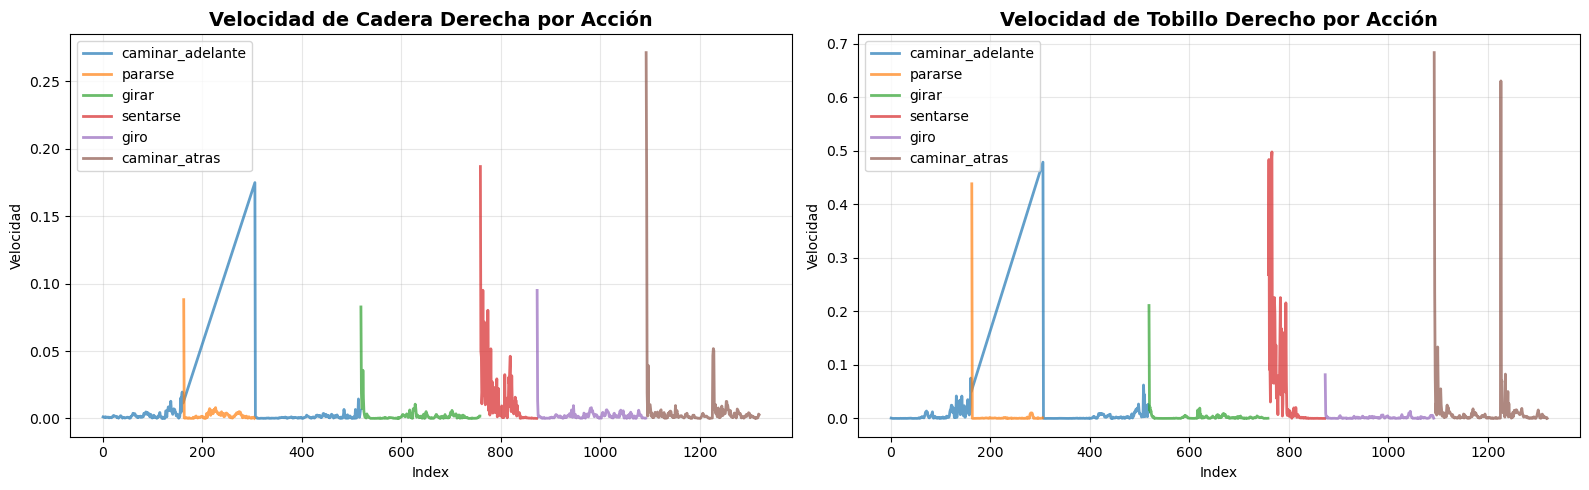

In [18]:
# Visualizar velocidad por acción
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico 1: Velocidad de cadera derecha
for action in df['action'].unique():
    action_data = df[df['action'] == action]
    axes[0].plot(action_data.index, action_data['speed_24'], label=action, alpha=0.7, linewidth=2)

axes[0].set_title('Velocidad de Cadera Derecha por Acción', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Velocidad')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Velocidad de tobillo derecho
for action in df['action'].unique():
    action_data = df[df['action'] == action]
    axes[1].plot(action_data.index, action_data['speed_28'], label=action, alpha=0.7, linewidth=2)

axes[1].set_title('Velocidad de Tobillo Derecho por Acción', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Velocidad')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Comparación: Movimientos Lentos vs Rápidos

COMPARACIÓN: LENTO vs RÁPIDO

Velocidad de Cadera Derecha (speed_24):
        count      mean       std       min       25%       50%       75%  \
speed                                                                       
01      476.0  0.005257  0.014013  0.000015  0.000515  0.001633  0.003982   
02      240.0  0.001914  0.006101  0.000012  0.000208  0.000673  0.001824   
lento   256.0  0.003307  0.005871  0.000021  0.000863  0.001613  0.003618   
rapido  347.0  0.003399  0.019862  0.000015  0.000313  0.000842  0.001975   

             max  
speed             
01      0.186836  
02      0.082696  
lento   0.051788  
rapido  0.271330  


Velocidad de Tobillo Derecho (speed_28):
        count      mean       std       min       25%       50%       75%  \
speed                                                                       
01      476.0  0.013203  0.053687  0.000004  0.000248  0.000703  0.002455   
02      240.0  0.002827  0.013824  0.000009  0.000152  0.000917  0.002506   
le

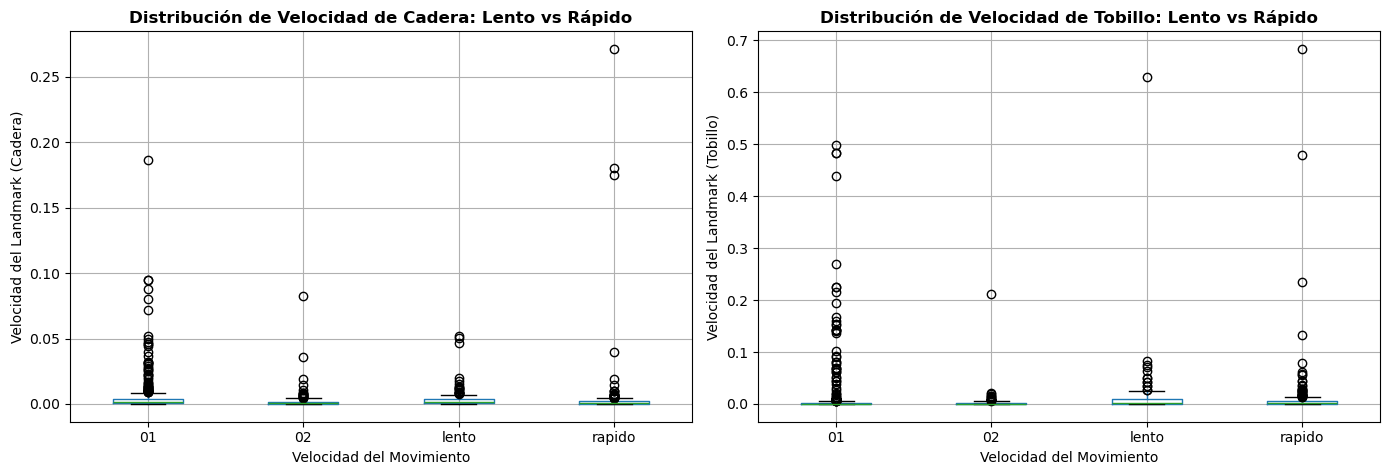

In [19]:
# Comparación estadística: lento vs rápido
print("="*60)
print("COMPARACIÓN: LENTO vs RÁPIDO")
print("="*60)

# Estadísticas por velocidad
print("\nVelocidad de Cadera Derecha (speed_24):")
print(df.groupby('speed')['speed_24'].describe())

print("\n" + "="*60)
print("\nVelocidad de Tobillo Derecho (speed_28):")
print(df.groupby('speed')['speed_28'].describe())

# Boxplots comparativos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot 1: Velocidad de cadera
df.boxplot(column='speed_24', by='speed', ax=axes[0])
axes[0].set_title('Distribución de Velocidad de Cadera: Lento vs Rápido', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Velocidad del Movimiento')
axes[0].set_ylabel('Velocidad del Landmark (Cadera)')
axes[0].get_figure().suptitle('')

# Boxplot 2: Velocidad de tobillo
df.boxplot(column='speed_28', by='speed', ax=axes[1])
axes[1].set_title('Distribución de Velocidad de Tobillo: Lento vs Rápido', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Velocidad del Movimiento')
axes[1].set_ylabel('Velocidad del Landmark (Tobillo)')
axes[1].get_figure().suptitle('')

plt.tight_layout()
plt.show()

## 7. Heatmap de Correlación de Landmarks

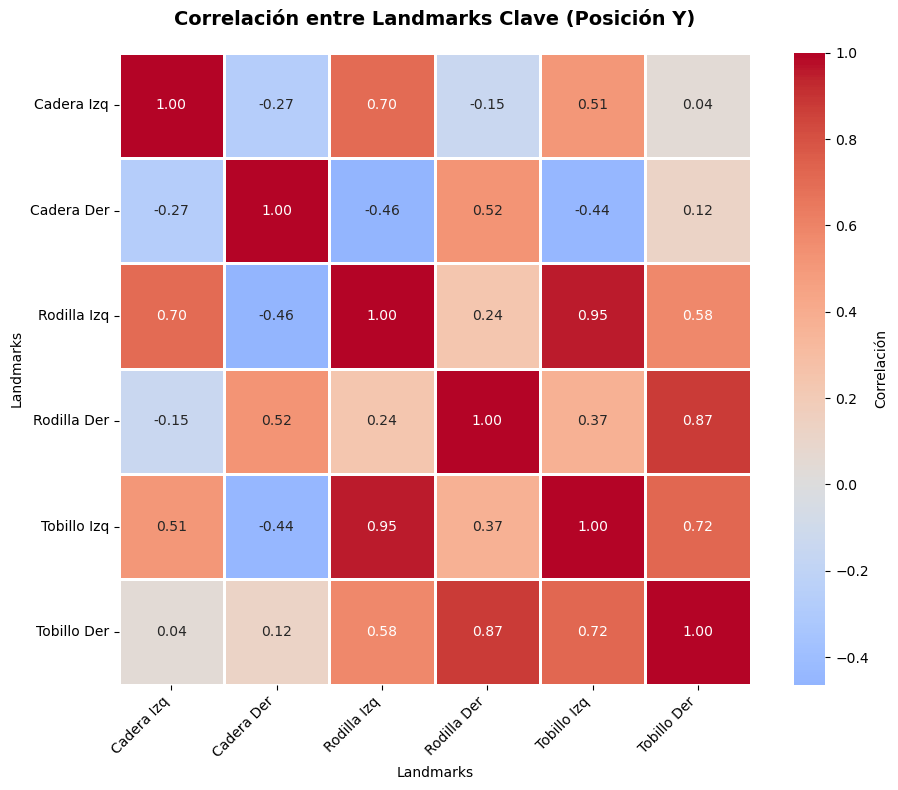

In [20]:
# Seleccionar solo columnas Y de landmarks clave para correlación
landmark_cols = [f'y_{idx}' for idx in key_landmarks.values()]
correlation_data = df[landmark_cols].corr()

# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Correlación'})

plt.title('Correlación entre Landmarks Clave (Posición Y)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Landmarks')
plt.ylabel('Landmarks')

# Renombrar etiquetas
labels = [name for name in key_landmarks.keys()]
plt.xticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=0)

plt.tight_layout()
plt.show()

## 8. Análisis de Visibilidad de Landmarks

ANÁLISIS DE VISIBILIDAD DE LANDMARKS

                 Media       Min       Max  Desv Est
Cadera Izq   0.999088  0.983725  0.999959  0.001695
Cadera Der   0.999210  0.991759  0.999931  0.001043
Rodilla Izq  0.946847  0.365905  0.997860  0.101829
Rodilla Der  0.929800  0.327854  0.995990  0.116107
Tobillo Izq  0.924341  0.210652  0.996493  0.127140
Tobillo Der  0.902631  0.183850  0.994923  0.146744


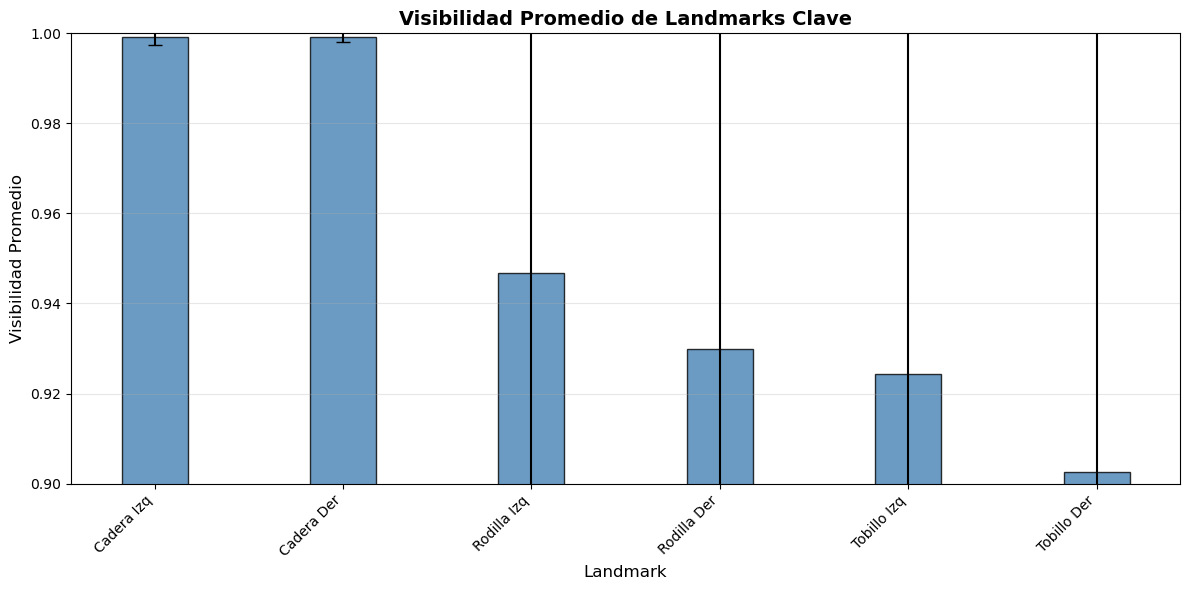

In [21]:
# Analizar visibilidad promedio de landmarks clave
print("="*60)
print("ANÁLISIS DE VISIBILIDAD DE LANDMARKS")
print("="*60)

visibility_stats = {}
for name, idx in key_landmarks.items():
    vis_col = f'visibility_{idx}'
    visibility_stats[name] = {
        'Media': df[vis_col].mean(),
        'Min': df[vis_col].min(),
        'Max': df[vis_col].max(),
        'Desv Est': df[vis_col].std()
    }

vis_df = pd.DataFrame(visibility_stats).T
print("\n", vis_df)

# Visualizar visibilidad
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(key_landmarks))
width = 0.35

means = [vis_df.loc[name, 'Media'] for name in key_landmarks.keys()]
stds = [vis_df.loc[name, 'Desv Est'] for name in key_landmarks.keys()]

bars = ax.bar(x, means, width, yerr=stds, capsize=5, 
              color='steelblue', alpha=0.8, edgecolor='black')

ax.set_xlabel('Landmark', fontsize=12)
ax.set_ylabel('Visibilidad Promedio', fontsize=12)
ax.set_title('Visibilidad Promedio de Landmarks Clave', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(key_landmarks.keys(), rotation=45, ha='right')
ax.set_ylim([0.9, 1.0])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 9. Conclusiones Iniciales del EDA

### Observaciones clave:
1. **Distribución de datos**: Análisis de frames por acción y velocidad
2. **Landmarks importantes**: Cadera, rodillas y tobillos son cruciales para análisis de movimiento
3. **Diferencias lento/rápido**: Las velocidades calculadas muestran diferencias claras
4. **Calidad de datos**: La visibilidad de landmarks es alta (>0.95 típicamente)

### Próximos pasos:
- Feature engineering adicional (ángulos, distancias relativas)
- Segmentación temporal de acciones
- Preparación de datos para modelado ML
- Análisis de patrones específicos por tipo de movimiento